# Testing everything

In [1]:
import pandas as pd
from datetime import datetime
from googlesearch import search
import time

In [2]:
def get_symbol_info(symbol: str):
    url1 = 'https://markets.ft.com/data/funds/tearsheet/performance?s={}'.format(symbol)
    try:
        df1 = pd.read_html(url1)[0]

        ds_perform = df1.loc[0].drop(['Unnamed: 0']).apply(lambda x: None if x[:-1] == '-' else float(x[:-1])/100.0)
        ds_perform['ft category'] = df1.loc[1]['Unnamed: 0']


        url2 = 'https://markets.ft.com/data/funds/tearsheet/historical?s={}'.format(symbol)
        df_quotes = pd.read_html(url2)[0]
        df_quotes['Date'] = df_quotes['Date'].apply(lambda x: x[:-17]).apply(lambda x: pd.to_datetime(x, infer_datetime_format = True).date())
        ds_quotes = df_quotes.set_index('Date',drop=True)['Close']

        ds_cat_perform = df1.loc[1].drop(['Unnamed: 0']).apply(lambda x: None if x[:-1] == '-' else float(x[:-1])/100.0)
        ds_cat_perform['ft category'] = df1.loc[1]['Unnamed: 0']

        url3 = 'https://markets.ft.com/data/funds/tearsheet/risk?s={}'.format(symbol)
        data = pd.read_html(url3)
        ds_risk = pd.concat([data[0], data[1]]).set_index('Unnamed: 0')['Fund']
        ds_cat_risk = pd.concat([data[0], data[1]]).set_index('Unnamed: 0')['Category average']
    except Exception as e:
        ds_perform, ds_cat_perform, ds_quotes,ds_risk, ds_cat_risk = None, None, None, None, None
    
    return ds_perform, ds_cat_perform, ds_quotes,ds_risk, ds_cat_risk
   

In [3]:
fund_list_file = 'fund_symbols.csv'
df = pd.read_csv(fund_list_file)[['symbol','name','category','risk','currency']].drop_duplicates(subset=['symbol'])
data = []
data_cat = []
dic_quote = dict()
for _,fund in df.iterrows():
    ds_perform, ds_cat_perform, ds_quotes,ds_risk, ds_cat_risk = get_symbol_info(fund['symbol'])
    if ds_perform is not None and ds_risk['Standard deviation'] != '--':
        lst = fund.to_list()
        lst += ds_perform.to_list()
        lst += [float(ds_risk['Standard deviation'][:-1])/100.0]
        lst += [ds_quotes.std()]
        lst_cat = fund[['category','risk']].to_list()
        lst_cat += ds_cat_perform.to_list()
        data.append(lst)
        data_cat.append(lst_cat)
        dic_quote[fund['symbol']] = ds_quotes
columns = ['symbol','name','category','risk','currency','5 years', '3 years', '1 year', '6 months', '3 months', '1 month', 'ft category', '1 year std', '1 month std']
columns_cat = ['m category','risk', '5 years', '3 years', '1 year', '6 months', '3 months', '1 month', 'ft category']
df_fund = pd.DataFrame(data=data, columns=columns).drop_duplicates(subset=['symbol'])
df_cat = pd.DataFrame(data=data_cat, columns=columns_cat).drop_duplicates(subset=['ft category'])
df_quote = pd.DataFrame(data=dic_quote)

In [4]:
df_quote_interp = df_quote.interpolate()

In [5]:
df_cat.sort_values(by='1 month',ascending=False).head(30)


,m category,risk,5 years,3 years,1 year,6 months,3 months,1 month,ft category
0,Ações Turquia,7,-0.0539,0.0584,0.2409,0.3848,0.2213,0.2396,Turkey Equity
59,Ações Sector Infra-estrutura,5,0.0749,0.1192,0.6654,0.2803,0.0536,0.1373,Sector Equity Energy
161,Mistos Moderados USD,5,0.1792,0.2673,0.0443,0.2449,0.1547,0.0980,Sector Equity Alternative Energy
175,Ações Global Frontier Markets,5,0.0350,0.0837,0.0974,0.0314,0.0666,0.0806,Global Frontier Markets Equity
29,Ações Indonésia,6,-0.0088,-0.0113,0.2873,0.1525,0.0696,0.0713,Indonesia Equity
146,Ações Tailândia,6,0.0097,-0.0487,0.1061,0.0039,0.0054,0.0709,Thailand Equity
243,Ações EUA Cap. Pequena,6,0.1084,0.1186,0.0152,0.0951,0.1299,0.0612,US Small-Cap Equity
34,Ações Sector Infra-estrutura,6,0.0515,0.0608,0.1346,0.1538,0.0550,0.0595,Sector Equity Infrastructure
225,Ações Índia,6,0.0746,0.1478,0.1102,0.0912,0.1190,0.0578,India Equity
232,Ações EUA Cap. Média,6,0.1031,0.1119,0.0544,0.1032,0.0984,0.0547,US Mid-Cap Equity


In [6]:
df_fund = df_fund.drop_duplicates(subset=['symbol'])
df_fund['my 1 month'] = df_fund.apply(lambda x: (df_quote_interp.iloc[-1]/df_quote_interp.iloc[0]-1)[x['symbol']],axis=1)
df_fund.sort_values(by='my 1 month',ascending=False).head(20)


,symbol,name,category,risk,currency,5 years,3 years,1 year,6 months,3 months,1 month,ft category,1 year std,1 month std,my 1 month
93,LU0286668453:USD,Fidelity US High Yield A-Acc-USD,Obrigações Alto Rend. USD,4,USD,-0.0603,-0.1277,-0.3131,-0.1623,-0.1219,0.0482,Asia High Yield Bond,0.2759,0.788348,0.288958
12,LU0067412154:USD,UBS (Lux) EF China Oppo(USD) P USD acc,Ações China,6,USD,0.0116,-0.0529,-0.1730,-0.0876,-0.0016,-0.0744,China Equity,0.4042,66.602513,0.225403
16,LU0072913022:USD,UBS (Lux) EF Greater China (USD) P,Ações Grande China,6,USD,0.0393,-0.0076,-0.1382,-0.0793,0.0196,-0.0585,Greater China Equity,0.3791,22.130883,0.216168
43,LU0117841949:USD,JPM Greater China D (acc) USD,Ações Grande China,6,USD,0.0511,0.0598,-0.2276,-0.1060,0.0203,-0.0415,Greater China Equity,0.3262,2.768498,0.204368
8,LU0173614495:USD,Fidelity China Focus A-Dis-USD,Ações China,6,USD,0.0088,0.0155,0.0624,0.0216,0.0862,-0.0083,China Equity,0.3467,2.954421,0.183131
10,LU0837970705:USD,abrdn China A Share Sus Eq A Acc USD,Ações China - A Shares,6,USD,0.0218,-0.0161,-0.1712,-0.0931,0.0561,-0.0640,China Equity,0.3491,0.548157,0.178363
25,LU0140636845:USD,Schroder ISF Emerging Asia B Acc USD,Ações Ásia ex Japão,6,USD,0.0541,0.0664,-0.1524,-0.0404,0.0565,-0.0576,Greater China Equity,0.3251,3.145398,0.167975
1,LU0244354824:USD,Schroder ISF China Opps B Acc USD,Ações China,6,USD,0.0167,0.0330,-0.1646,-0.0166,0.0778,-0.0616,China Equity,0.3403,13.787897,0.145995
64,LU1044871900:USD,T. Rowe Price Asian Opp Eq A USD,Ações Ásia ex Japão,6,USD,0.0574,0.0590,-0.0889,-0.0384,0.0477,-0.0181,Asia ex-Japan Equity,0.2365,0.657317,0.142000
45,LU0522352946:EUR,JPM Greater China D (acc) EUR,Ações Grande China,6,EUR,0.0525,0.0611,-0.2226,-0.0965,0.0285,-0.0340,Greater China Equity,0.3200,7.026640,0.141653


In [7]:
s_to_n = df_fund[['symbol','name']].set_index('symbol')['name'].to_dict()

<AxesSubplot:xlabel='Date'>

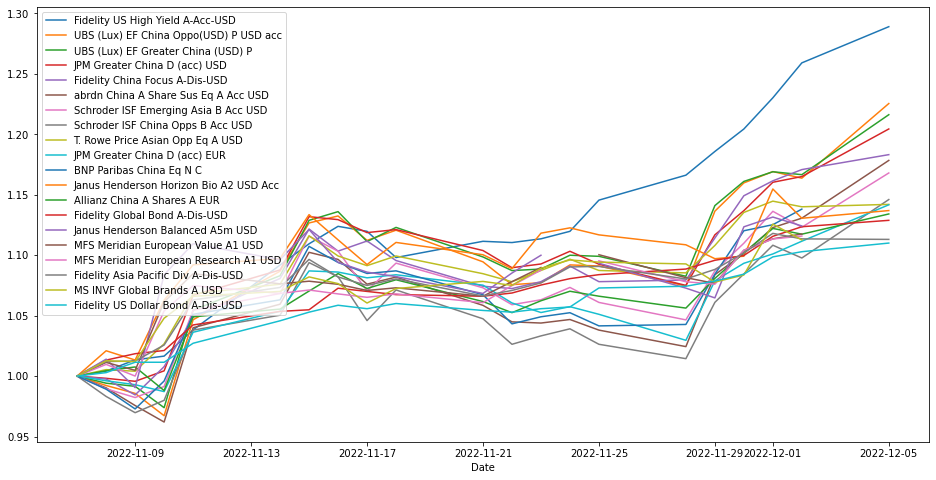

In [8]:
top_month = df_fund.sort_values(by='my 1 month',ascending=False).head(20)['symbol']
df_quote.apply(lambda x: x/df_quote.iloc[0],axis=1)[top_month].rename(columns=s_to_n).plot(figsize=(16,8))

In [9]:
df_fund['1 month racio'] = df_fund['my 1 month'] / df_fund['1 month std']
df_fund.sort_values(by='1 month racio',ascending=False).head(10)


,symbol,name,category,risk,currency,5 years,3 years,1 year,6 months,3 months,1 month,ft category,1 year std,1 month std,my 1 month,1 month racio
144,IE00BBPRD471:EUR,Invesco Real Return (EUR) Bond E EUR Acc,Obrigações Flexível Globais-EUR Hedged,4,EUR,0.0075,-0.0035,-0.0764,-0.0139,-0.0178,0.0026,EUR Flexible Allocation - Global,0.0752,0.005774,0.018182,3.149183
164,IE00BD5CTV53:USD,BNY Mellon Global Hi Yld Bd A EUR Acc,Obrigações Alto Rend. Globais,4,EUR,0.0373,0.0190,0.1162,0.1044,0.0510,0.0343,Global High Yield Bond,0.0798,0.008522,0.026087,3.060981
99,IE00B4Z6MP99:EUR,BNY Mellon Glbl Rl Ret (EUR) A Inc,Mistos Flexíveis EUR - Global,4,EUR,0.0126,0.0015,-0.0718,-0.0115,-0.0165,0.0031,EUR Flexible Allocation - Global,0.0752,0.006437,0.013793,2.142950
33,IE00BLP5S460:EUR,JupiterMerian Glb Eq AbsRt L € H Acc,Alternativo Market Neutral - Ações EUR,4,EUR,-0.0290,0.0012,0.0440,0.0098,-0.0293,-0.0104,Equity Market Neutral EUR,0.0796,0.010911,0.014925,1.367933
4,LU0900496406:EUR,JPM China D (acc) EUR,Ações China,6,EUR,-0.0434,-0.0719,-0.2081,-0.1122,-0.0590,0.0253,Global Emerging Markets Corporate Bond - EUR B...,0.1421,0.177515,0.091454,0.515193
172,LU1952109004:USD,T. Rowe Price Glb Alloc A USD,Mistos Moderados USD,5,USD,NaN,NaN,-0.0814,0.0075,0.0307,0.0641,Global Emerging Markets Bond,0.1089,0.195362,0.097842,0.500824
58,LU0605512192:EUR,Fidelity US Dollar Bond A-Dis-USD,Obrigações Diversificado USD,3,USD,-0.0323,-0.0579,-0.1650,-0.0933,-0.0495,0.0008,Other Bond,0.1526,0.220066,0.110000,0.499850
203,IE00BYX5NK04:USD,Fidelity MSCI Emerg Mkts Indx USD P Acc,Ações Emergentes Global,6,USD,NaN,0.1240,0.0348,0.0687,0.0855,0.0531,Global Large-Cap Blend Equity,0.1513,0.161265,0.080123,0.496843
121,LU0815116750:USD,Capital Group EM Tot Opp (LUX) Bgd,Mistos Mercados Emergentes Globais,5,USD,0.0085,0.0086,-0.0711,0.0036,0.0386,0.0529,Global Emerging Markets Allocation,0.0988,0.143177,0.067215,0.469456
31,LU0905234141:USD,Fidelity Asian Bond A-Acc-USD,Obrigações Ásia,4,USD,0.0208,-0.0056,-0.0108,0.0254,0.0153,0.0265,USD Moderate Allocation,0.0775,0.136415,0.061995,0.454456


In [10]:
df_fund['1 week'] = df_fund.apply(lambda x: (df_quote_interp.iloc[-1]/df_quote_interp.iloc[-6]-1)[x['symbol']],axis=1)
df_fund['1 week racio'] = df_fund['1 week'] / df_fund['1 month std']
df_fund.sort_values(by='1 week',ascending=False).head(10)

,symbol,name,category,risk,currency,5 years,3 years,1 year,6 months,3 months,1 month,ft category,1 year std,1 month std,my 1 month,1 month racio,1 week,1 week racio
10,LU0837970705:USD,abrdn China A Share Sus Eq A Acc USD,Ações China - A Shares,6,USD,0.0218,-0.0161,-0.1712,-0.0931,0.0561,-0.0640,China Equity,0.3491,0.548157,0.178363,0.325386,0.150333,0.274252
12,LU0067412154:USD,UBS (Lux) EF China Oppo(USD) P USD acc,Ações China,6,USD,0.0116,-0.0529,-0.1730,-0.0876,-0.0016,-0.0744,China Equity,0.4042,66.602513,0.225403,0.003384,0.140505,0.002110
1,LU0244354824:USD,Schroder ISF China Opps B Acc USD,Ações China,6,USD,0.0167,0.0330,-0.1646,-0.0166,0.0778,-0.0616,China Equity,0.3403,13.787897,0.145995,0.010589,0.129723,0.009409
16,LU0072913022:USD,UBS (Lux) EF Greater China (USD) P,Ações Grande China,6,USD,0.0393,-0.0076,-0.1382,-0.0793,0.0196,-0.0585,Greater China Equity,0.3791,22.130883,0.216168,0.009768,0.123430,0.005577
43,LU0117841949:USD,JPM Greater China D (acc) USD,Ações Grande China,6,USD,0.0511,0.0598,-0.2276,-0.1060,0.0203,-0.0415,Greater China Equity,0.3262,2.768498,0.204368,0.073819,0.120353,0.043472
25,LU0140636845:USD,Schroder ISF Emerging Asia B Acc USD,Ações Ásia ex Japão,6,USD,0.0541,0.0664,-0.1524,-0.0404,0.0565,-0.0576,Greater China Equity,0.3251,3.145398,0.167975,0.053403,0.116112,0.036915
45,LU0522352946:EUR,JPM Greater China D (acc) EUR,Ações Grande China,6,EUR,0.0525,0.0611,-0.2226,-0.0965,0.0285,-0.0340,Greater China Equity,0.3200,7.026640,0.141653,0.020159,0.108854,0.015492
93,LU0286668453:USD,Fidelity US High Yield A-Acc-USD,Obrigações Alto Rend. USD,4,USD,-0.0603,-0.1277,-0.3131,-0.1623,-0.1219,0.0482,Asia High Yield Bond,0.2759,0.788348,0.288958,0.366535,0.105310,0.133583
8,LU0173614495:USD,Fidelity China Focus A-Dis-USD,Ações China,6,USD,0.0088,0.0155,0.0624,0.0216,0.0862,-0.0083,China Equity,0.3467,2.954421,0.183131,0.061985,0.096093,0.032525
78,LU0823426720:USD,BNP Paribas China Eq N C,Ações China,6,USD,0.0260,0.0164,-0.1890,-0.0971,0.0365,-0.0512,China Equity,0.3792,14.893842,0.138085,0.009271,0.091493,0.006143


In [11]:
df_fund[df_fund['my 1 month']>0.0].sort_values(by='1 week',ascending=False).head(10)

,symbol,name,category,risk,currency,5 years,3 years,1 year,6 months,3 months,1 month,ft category,1 year std,1 month std,my 1 month,1 month racio,1 week,1 week racio
10,LU0837970705:USD,abrdn China A Share Sus Eq A Acc USD,Ações China - A Shares,6,USD,0.0218,-0.0161,-0.1712,-0.0931,0.0561,-0.0640,China Equity,0.3491,0.548157,0.178363,0.325386,0.150333,0.274252
12,LU0067412154:USD,UBS (Lux) EF China Oppo(USD) P USD acc,Ações China,6,USD,0.0116,-0.0529,-0.1730,-0.0876,-0.0016,-0.0744,China Equity,0.4042,66.602513,0.225403,0.003384,0.140505,0.002110
1,LU0244354824:USD,Schroder ISF China Opps B Acc USD,Ações China,6,USD,0.0167,0.0330,-0.1646,-0.0166,0.0778,-0.0616,China Equity,0.3403,13.787897,0.145995,0.010589,0.129723,0.009409
16,LU0072913022:USD,UBS (Lux) EF Greater China (USD) P,Ações Grande China,6,USD,0.0393,-0.0076,-0.1382,-0.0793,0.0196,-0.0585,Greater China Equity,0.3791,22.130883,0.216168,0.009768,0.123430,0.005577
43,LU0117841949:USD,JPM Greater China D (acc) USD,Ações Grande China,6,USD,0.0511,0.0598,-0.2276,-0.1060,0.0203,-0.0415,Greater China Equity,0.3262,2.768498,0.204368,0.073819,0.120353,0.043472
25,LU0140636845:USD,Schroder ISF Emerging Asia B Acc USD,Ações Ásia ex Japão,6,USD,0.0541,0.0664,-0.1524,-0.0404,0.0565,-0.0576,Greater China Equity,0.3251,3.145398,0.167975,0.053403,0.116112,0.036915
45,LU0522352946:EUR,JPM Greater China D (acc) EUR,Ações Grande China,6,EUR,0.0525,0.0611,-0.2226,-0.0965,0.0285,-0.0340,Greater China Equity,0.3200,7.026640,0.141653,0.020159,0.108854,0.015492
93,LU0286668453:USD,Fidelity US High Yield A-Acc-USD,Obrigações Alto Rend. USD,4,USD,-0.0603,-0.1277,-0.3131,-0.1623,-0.1219,0.0482,Asia High Yield Bond,0.2759,0.788348,0.288958,0.366535,0.105310,0.133583
8,LU0173614495:USD,Fidelity China Focus A-Dis-USD,Ações China,6,USD,0.0088,0.0155,0.0624,0.0216,0.0862,-0.0083,China Equity,0.3467,2.954421,0.183131,0.061985,0.096093,0.032525
78,LU0823426720:USD,BNP Paribas China Eq N C,Ações China,6,USD,0.0260,0.0164,-0.1890,-0.0971,0.0365,-0.0512,China Equity,0.3792,14.893842,0.138085,0.009271,0.091493,0.006143


In [12]:
df_fund[df_fund['my 1 month']>0.0].sort_values(by='1 week racio',ascending=False).head(20)

,symbol,name,category,risk,currency,5 years,3 years,1 year,6 months,3 months,1 month,ft category,1 year std,1 month std,my 1 month,1 month racio,1 week,1 week racio
144,IE00BBPRD471:EUR,Invesco Real Return (EUR) Bond E EUR Acc,Obrigações Flexível Globais-EUR Hedged,4,EUR,0.0075,-0.0035,-0.0764,-0.0139,-0.0178,0.0026,EUR Flexible Allocation - Global,0.0752,0.005774,0.018182,3.149183,0.018182,3.149183
99,IE00B4Z6MP99:EUR,BNY Mellon Glbl Rl Ret (EUR) A Inc,Mistos Flexíveis EUR - Global,4,EUR,0.0126,0.0015,-0.0718,-0.0115,-0.0165,0.0031,EUR Flexible Allocation - Global,0.0752,0.006437,0.013793,2.142950,0.013793,2.142950
10,LU0837970705:USD,abrdn China A Share Sus Eq A Acc USD,Ações China - A Shares,6,USD,0.0218,-0.0161,-0.1712,-0.0931,0.0561,-0.0640,China Equity,0.3491,0.548157,0.178363,0.325386,0.150333,0.274252
121,LU0815116750:USD,Capital Group EM Tot Opp (LUX) Bgd,Mistos Mercados Emergentes Globais,5,USD,0.0085,0.0086,-0.0711,0.0036,0.0386,0.0529,Global Emerging Markets Allocation,0.0988,0.143177,0.067215,0.469456,0.029101,0.203249
158,LU1629966570:EUR,AB EM Multi-Asset A USD,Mistos Mercados Emergentes Globais,5,USD,0.0140,0.0115,-0.0393,-0.0016,0.0385,0.0231,Asia Allocation,0.1385,0.201304,0.049254,0.244673,0.040711,0.202234
94,LU0963897870:EUR,abrdn GDP WtdGlb GovtBd A Acc EUR,Obrigações Globais,4,EUR,0.0028,-0.0244,-0.0128,0.0005,0.0183,0.0136,Global Bond,0.0592,0.065567,0.013061,0.199204,0.012235,0.186601
204,IE00BYX5NX33:EUR,Fidelity MSCI Emerg Mkts Indx EUR P Acc,Ações Emergentes Global,6,EUR,NaN,0.1240,0.0348,0.0687,0.0855,0.0531,Global Large-Cap Blend Equity,0.1513,0.103598,0.032663,0.315288,0.017327,0.167249
203,IE00BYX5NK04:USD,Fidelity MSCI Emerg Mkts Indx USD P Acc,Ações Emergentes Global,6,USD,NaN,0.1240,0.0348,0.0687,0.0855,0.0531,Global Large-Cap Blend Equity,0.1513,0.161265,0.080123,0.496843,0.024854,0.154118
47,LU0532656005:USD,Capital Group EM Local Debt (LUX) B,Obrigações Emergentes Moeda Local,4,USD,-0.0094,-0.0243,-0.0138,-0.0029,0.0352,0.0536,Global Emerging Markets Bond - Local Currency,0.0855,0.139166,0.057586,0.413793,0.021390,0.153704
58,LU0605512192:EUR,Fidelity US Dollar Bond A-Dis-USD,Obrigações Diversificado USD,3,USD,-0.0323,-0.0579,-0.1650,-0.0933,-0.0495,0.0008,Other Bond,0.1526,0.220066,0.110000,0.499850,0.033245,0.151067


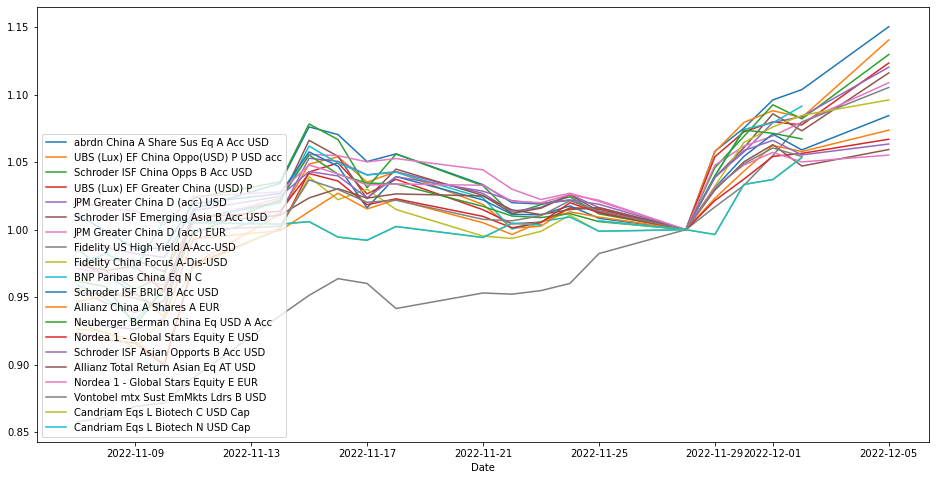

In [13]:
top_week = df_fund.sort_values(by='1 week',ascending=False).head(20)['symbol']
df_quote.apply(lambda x: x/df_quote.iloc[-6],axis=1)[top_week].rename(columns=s_to_n).plot(figsize=(16,8)).legend(loc=3)

In [14]:
df_fund[df_fund['symbol'].isin(top_week)].sort_values(by='my 1 month',ascending=False).head(20)

,symbol,name,category,risk,currency,5 years,3 years,1 year,6 months,3 months,1 month,ft category,1 year std,1 month std,my 1 month,1 month racio,1 week,1 week racio
93,LU0286668453:USD,Fidelity US High Yield A-Acc-USD,Obrigações Alto Rend. USD,4,USD,-0.0603,-0.1277,-0.3131,-0.1623,-0.1219,0.0482,Asia High Yield Bond,0.2759,0.788348,0.288958,0.366535,0.105310,0.133583
12,LU0067412154:USD,UBS (Lux) EF China Oppo(USD) P USD acc,Ações China,6,USD,0.0116,-0.0529,-0.1730,-0.0876,-0.0016,-0.0744,China Equity,0.4042,66.602513,0.225403,0.003384,0.140505,0.002110
16,LU0072913022:USD,UBS (Lux) EF Greater China (USD) P,Ações Grande China,6,USD,0.0393,-0.0076,-0.1382,-0.0793,0.0196,-0.0585,Greater China Equity,0.3791,22.130883,0.216168,0.009768,0.123430,0.005577
43,LU0117841949:USD,JPM Greater China D (acc) USD,Ações Grande China,6,USD,0.0511,0.0598,-0.2276,-0.1060,0.0203,-0.0415,Greater China Equity,0.3262,2.768498,0.204368,0.073819,0.120353,0.043472
8,LU0173614495:USD,Fidelity China Focus A-Dis-USD,Ações China,6,USD,0.0088,0.0155,0.0624,0.0216,0.0862,-0.0083,China Equity,0.3467,2.954421,0.183131,0.061985,0.096093,0.032525
10,LU0837970705:USD,abrdn China A Share Sus Eq A Acc USD,Ações China - A Shares,6,USD,0.0218,-0.0161,-0.1712,-0.0931,0.0561,-0.0640,China Equity,0.3491,0.548157,0.178363,0.325386,0.150333,0.274252
25,LU0140636845:USD,Schroder ISF Emerging Asia B Acc USD,Ações Ásia ex Japão,6,USD,0.0541,0.0664,-0.1524,-0.0404,0.0565,-0.0576,Greater China Equity,0.3251,3.145398,0.167975,0.053403,0.116112,0.036915
1,LU0244354824:USD,Schroder ISF China Opps B Acc USD,Ações China,6,USD,0.0167,0.0330,-0.1646,-0.0166,0.0778,-0.0616,China Equity,0.3403,13.787897,0.145995,0.010589,0.129723,0.009409
45,LU0522352946:EUR,JPM Greater China D (acc) EUR,Ações Grande China,6,EUR,0.0525,0.0611,-0.2226,-0.0965,0.0285,-0.0340,Greater China Equity,0.3200,7.026640,0.141653,0.020159,0.108854,0.015492
78,LU0823426720:USD,BNP Paribas China Eq N C,Ações China,6,USD,0.0260,0.0164,-0.1890,-0.0971,0.0365,-0.0512,China Equity,0.3792,14.893842,0.138085,0.009271,0.091493,0.006143


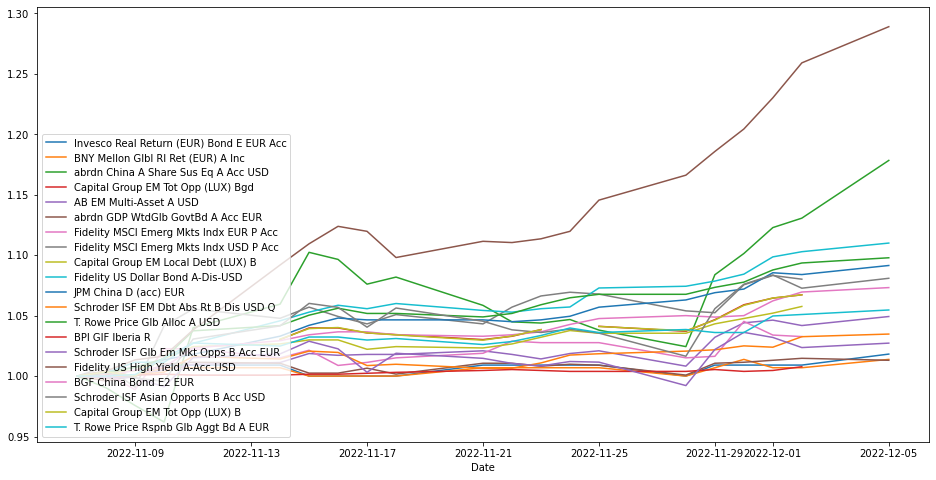

In [15]:
top_week = df_fund.sort_values(by='1 week racio',ascending=False).head(20)['symbol']
df_quote.apply(lambda x: x/df_quote.iloc[0],axis=1)[top_week].rename(columns=s_to_n).plot(figsize=(16,8)).legend(loc=3)

In [16]:
df_fund[df_fund['symbol'].isin(top_week)].sort_values(by='my 1 month',ascending=False).head(20)

,symbol,name,category,risk,currency,5 years,3 years,1 year,6 months,3 months,1 month,ft category,1 year std,1 month std,my 1 month,1 month racio,1 week,1 week racio
93,LU0286668453:USD,Fidelity US High Yield A-Acc-USD,Obrigações Alto Rend. USD,4,USD,-0.0603,-0.1277,-0.3131,-0.1623,-0.1219,0.0482,Asia High Yield Bond,0.2759,0.788348,0.288958,0.366535,0.105310,0.133583
10,LU0837970705:USD,abrdn China A Share Sus Eq A Acc USD,Ações China - A Shares,6,USD,0.0218,-0.0161,-0.1712,-0.0931,0.0561,-0.0640,China Equity,0.3491,0.548157,0.178363,0.325386,0.150333,0.274252
58,LU0605512192:EUR,Fidelity US Dollar Bond A-Dis-USD,Obrigações Diversificado USD,3,USD,-0.0323,-0.0579,-0.1650,-0.0933,-0.0495,0.0008,Other Bond,0.1526,0.220066,0.110000,0.499850,0.033245,0.151067
172,LU1952109004:USD,T. Rowe Price Glb Alloc A USD,Mistos Moderados USD,5,USD,NaN,NaN,-0.0814,0.0075,0.0307,0.0641,Global Emerging Markets Bond,0.1089,0.195362,0.097842,0.500824,0.028302,0.144869
4,LU0900496406:EUR,JPM China D (acc) EUR,Ações China,6,EUR,-0.0434,-0.0719,-0.2081,-0.1122,-0.0590,0.0253,Global Emerging Markets Corporate Bond - EUR B...,0.1421,0.177515,0.091454,0.515193,0.026798,0.150964
153,LU0248184466:EUR,Schroder ISF Asian Opports B Acc USD,Ações Ásia ex Japão,6,USD,0.0347,0.0463,-0.0941,-0.0324,0.0567,-0.0043,Asia ex-Japan Equity,0.1335,0.493071,0.080874,0.164022,0.063441,0.128665
203,IE00BYX5NK04:USD,Fidelity MSCI Emerg Mkts Indx USD P Acc,Ações Emergentes Global,6,USD,NaN,0.1240,0.0348,0.0687,0.0855,0.0531,Global Large-Cap Blend Equity,0.1513,0.161265,0.080123,0.496843,0.024854,0.154118
27,LU1062842700:EUR,BGF China Bond E2 EUR,Obrigações China,5,EUR,-0.0606,-0.0937,-0.2257,-0.1012,-0.0527,-0.0029,Other Bond,0.1048,0.169428,0.073171,0.431870,0.022067,0.130247
121,LU0815116750:USD,Capital Group EM Tot Opp (LUX) Bgd,Mistos Mercados Emergentes Globais,5,USD,0.0085,0.0086,-0.0711,0.0036,0.0386,0.0529,Global Emerging Markets Allocation,0.0988,0.143177,0.067215,0.469456,0.029101,0.203249
122,LU0302646574:USD,Capital Group EM Tot Opp (LUX) B,Mistos Mercados Emergentes Globais,5,USD,0.0085,0.0087,-0.0707,0.0037,0.0395,0.0531,Global Emerging Markets Allocation,0.0985,0.225386,0.067190,0.298112,0.028595,0.126873


In [17]:
df_fund.groupby(by=['category']).mean().sort_values(by='1 week',ascending=False).head(20)

,risk,5 years,3 years,1 year,6 months,3 months,1 month,1 year std,1 month std,my 1 month,1 month racio,1 week,1 week racio
category,,,,,,,,,,,,,
Ações Grande China,6.000000,0.047633,0.037767,-0.196133,-0.093933,0.022800,-0.044667,0.341767,10.642007,0.187396,0.034582,0.117546,0.021514
Ações China - A Shares,6.000000,0.017200,0.023200,-0.139550,-0.086900,0.034750,-0.031350,0.270700,1.470953,0.156219,0.190699,0.112022,0.152523
Ações BRIC,6.000000,0.006600,-0.034000,-0.190500,-0.038400,0.045700,-0.003700,0.195400,5.158303,0.072410,0.014038,0.084491,0.016380
Ações China,6.142857,0.010843,-0.005743,-0.120686,-0.050457,0.032471,-0.017829,0.299557,14.200234,0.141594,0.153872,0.083240,0.057159
Ações Ásia ex Japão,6.000000,0.056720,0.067560,-0.105300,-0.021820,0.051420,-0.012700,0.211420,1.589955,0.102677,0.108792,0.057864,0.051800
Ações Sector Biotecnologia,6.000000,0.098900,0.120400,-0.013567,0.189433,0.168300,0.057900,0.188667,10.329437,0.100204,0.014722,0.044129,0.004711
Ações Ásia Pacífico ex Japão,6.000000,0.077700,0.101400,-0.010750,-0.008800,0.029600,0.011850,0.179750,0.769419,0.103549,0.134325,0.036280,0.047793
Mistos Ásia,4.500000,0.021200,0.010950,0.004550,0.011750,0.020250,0.017300,0.112700,0.530583,0.100262,0.230639,0.035421,0.083440
Ações Emergentes Global,5.846154,0.026291,0.046177,-0.067469,-0.017085,0.033369,0.026731,0.155500,2.025418,0.060599,0.104038,0.035365,0.055977


In [18]:
top_cat = df_fund.groupby(by=['category']).mean().sort_values(by='1 week',ascending=False).head(20)
df_fund[df_fund['category'].isin(top_cat.index)].groupby(by=['category']).count()['symbol'].sort_values(ascending=False)

category
Ações Emergentes Global                   13
Ações Global Cap. Grande Misto            11
Ações China                                7
Ações Sector Saúde                         5
Ações Ásia ex Japão                        5
Mistos Mercados Emergentes Globais         4
Obrigações Alto Rend. USD                  4
Ações Grande China                         3
Ações Sector Biotecnologia                 3
Ações Tailândia                            2
Ações China - A Shares                     2
Ações EUA Cap. Pequena                     2
Ações Ásia Pacífico ex Japão               2
Mistos Ásia                                2
Obrigações China                           1
Ações BRIC                                 1
Imobiliário Indirecto América do Norte     1
Ações Ásia ex Japão Cap. Peq/Média         1
Ações Global Cap. Flexível                 1
Obrigações Diversificado USD               1
Name: symbol, dtype: int64

In [19]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(df_quote)
S = CovarianceShrinkage(df_quote).ledoit_wolf()

In [20]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
cleaned_weights = [(s,w) for s,w in cleaned_weights.items() if w > 0.0]
cleaned_weights

[('LU1216622305:USD', 0.00578),
 ('IE00BD3B9479:EUR', 0.02641),
 ('IE00B6116G19:USD', 0.01109),
 ('LU1245572752:EUR', 0.00668),
 ('IE00BDRVT430:USD', 0.00063),
 ('LU0792749094:EUR', 0.01093),
 ('IE00BLP5S460:EUR', 0.00951),
 ('LU1176912761:EUR', 0.05329),
 ('LU0784438805:EUR', 0.00867),
 ('IE00B2R34X65:USD', 0.00902),
 ('LU0232535426:EUR', 0.03969),
 ('LU0607983201:EUR', 0.04869),
 ('IE0002122038:EUR', 0.02854),
 ('LU0583242994:EUR', 0.02226),
 ('LU0414665884:EUR', 0.02004),
 ('LU1797811236:EUR', 0.01304),
 ('LU0286668453:USD', 0.18083),
 ('IE00B4Z6MP99:EUR', 0.00545),
 ('LU0132385534:GBP', 0.00217),
 ('LU0546921882:EUR', 0.01786),
 ('LU1074970648:CNH', 0.02043),
 ('IE00BD3B6K23:USD', 0.02713),
 ('LU0613078343:EUR', 0.00383),
 ('LU1582988058:EUR', 0.00465),
 ('LU0181358762:EUR', 0.00789),
 ('LU1625225237:EUR', 0.00862),
 ('LU0534240741:EUR', 0.01833),
 ('LU0238205958:USD', 0.01088),
 ('LU0265292556:EUR', 0.00031),
 ('IE00BBPRD471:EUR', 0.00767),
 ('LU0219418836:EUR', 0.01439),
 ('LU035

In [21]:
df_port = df_fund[df_fund['symbol'].isin([s for s,_ in cleaned_weights])]
df_port.sort_values(by='1 month racio',ascending=False)

,symbol,name,category,risk,currency,5 years,3 years,1 year,6 months,3 months,1 month,ft category,1 year std,1 month std,my 1 month,1 month racio,1 week,1 week racio
144,IE00BBPRD471:EUR,Invesco Real Return (EUR) Bond E EUR Acc,Obrigações Flexível Globais-EUR Hedged,4,EUR,0.0075,-0.0035,-0.0764,-0.0139,-0.0178,0.0026,EUR Flexible Allocation - Global,0.0752,0.005774,0.018182,3.149183,0.018182,3.149183
164,IE00BD5CTV53:USD,BNY Mellon Global Hi Yld Bd A EUR Acc,Obrigações Alto Rend. Globais,4,EUR,0.0373,0.0190,0.1162,0.1044,0.0510,0.0343,Global High Yield Bond,0.0798,0.008522,0.026087,3.060981,0.000000,0.000000
99,IE00B4Z6MP99:EUR,BNY Mellon Glbl Rl Ret (EUR) A Inc,Mistos Flexíveis EUR - Global,4,EUR,0.0126,0.0015,-0.0718,-0.0115,-0.0165,0.0031,EUR Flexible Allocation - Global,0.0752,0.006437,0.013793,2.142950,0.013793,2.142950
33,IE00BLP5S460:EUR,JupiterMerian Glb Eq AbsRt L € H Acc,Alternativo Market Neutral - Ações EUR,4,EUR,-0.0290,0.0012,0.0440,0.0098,-0.0293,-0.0104,Equity Market Neutral EUR,0.0796,0.010911,0.014925,1.367933,0.000000,0.000000
93,LU0286668453:USD,Fidelity US High Yield A-Acc-USD,Obrigações Alto Rend. USD,4,USD,-0.0603,-0.1277,-0.3131,-0.1623,-0.1219,0.0482,Asia High Yield Bond,0.2759,0.788348,0.288958,0.366535,0.105310,0.133583
132,LU1625225237:EUR,Invesco Global Ttl Ret EUR Bd E EUR Acc,Obrigações Flexível Globais-EUR Hedged,3,EUR,-0.0077,-0.0243,-0.0667,-0.0257,-0.0240,-0.0021,Global Flexible Bond - EUR Hedged,0.0670,0.151475,0.048659,0.321236,0.012464,0.082284
118,LU1582988058:EUR,M&G (Lux) Sustainable Allc AH USD Acc,Mistos Moderados USD,4,USD,-0.0117,0.0106,-0.0463,-0.0082,-0.0224,0.0027,EUR Flexible Allocation - Global,0.0620,0.133577,0.041710,0.312255,0.013185,0.098704
169,LU1670707956:USD,M&G (Lux) Eurp Strat Val A USD Acc,Ações Europa Cap. Grande Valor,6,USD,0.0280,0.0729,0.0329,0.0204,-0.0476,0.0228,Europe Large-Cap Value Equity,0.1502,0.316927,0.094622,0.298559,0.020427,0.064454
40,LU0784438805:EUR,BPI GIF Iberia R,Ações Espanha,6,EUR,-0.0062,-0.0066,-0.0360,-0.0019,-0.0191,-0.0134,Equity Market Neutral EUR,0.0598,0.026651,0.007728,0.289972,0.003849,0.144428
133,LU0534240741:EUR,Invesco Global Ttl Ret EUR Bd E EUR QD,Obrigações Flexível Globais-EUR Hedged,3,EUR,-0.0161,-0.0325,-0.0746,-0.0298,-0.0261,-0.0029,Global Flexible Bond - EUR Hedged,0.0669,0.142780,0.040566,0.284115,0.005469,0.038307
